In [1]:
from glob import glob
import os
!pip install mne
import mne
import numpy as np
import pandas
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 117.0 MB/s eta 0:00:00


In [2]:
# 🔒 Fix all random seeds for reproducibility
import random
import tensorflow as tf # Assuming TensorFlow is needed based on tf.random.set_seed

os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

# Optional: Limit CPU/GPU parallel threads (helps reduce randomness)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import glob            # for file locations
import pprint          # for pretty printing
import re

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

In [5]:
DOWNLOAD_DIR = "/content/drive/MyDrive/Bonn dataset"


In [6]:
import os

# You likely need to define EPIL_dir_file_list before using it.
# Assuming it should contain a list of directories, you might have intended something like:
EPIL_dir_file_list = [
    '/content/drive/MyDrive/Bonn dataset/F',
    '/content/drive/MyDrive/Bonn dataset/N',
    '/content/drive/MyDrive/Bonn dataset/O',
    '/content/drive/MyDrive/Bonn dataset/S',
    '/content/drive/MyDrive/Bonn dataset/Z'

]

epil_baseline_file = os.path.join(EPIL_dir_file_list[0], 'F060.txt')
epil_seizure_file = os.path.join(EPIL_dir_file_list[3], 'S033.txt')

In [7]:
# Mapping from folder names (ZONFS) to set names (ABCDE)

mapping_set_to_dir = {
    'A': (0,'/content/drive/MyDrive/Bonn dataset/Z'),
    'B': (1,'/content/drive/MyDrive/Bonn dataset/O'),
    'C': (2,'/content/drive/MyDrive/Bonn dataset/N'),
    'D': (3,'/content/drive/MyDrive/Bonn dataset/F'),
    'E': (4,'/content/drive/MyDrive/Bonn dataset/S'),

}

In [8]:
def preprocess_data(file):
    import pandas as pd
    df = pd.read_csv(file, header=None)
    data = df.values.flatten()
    expected_length = 4097
    if len(data) > expected_length:
        data = data[:expected_length]
    elif len(data) < expected_length:
        pad_width = expected_length - len(data)
        data = np.pad(data, (0, pad_width), mode='constant')
    data = data / np.max(np.abs(data))
    data = np.expand_dims(data, axis=(0, -1))
    return data


In [9]:
from os import listdir, mkdir
from os.path import isfile, join

file_lists = []
for s,d in mapping_set_to_dir.items():
    file_lists.insert(d[0], [f for f in listdir(d[1]) if isfile(join(d[1], f))])

In [10]:
for s,d in mapping_set_to_dir.items():
 print(s,d[0],d[1])


A 0 /content/drive/MyDrive/Bonn dataset/Z
B 1 /content/drive/MyDrive/Bonn dataset/O
C 2 /content/drive/MyDrive/Bonn dataset/N
D 3 /content/drive/MyDrive/Bonn dataset/F
E 4 /content/drive/MyDrive/Bonn dataset/S


In [11]:
import numpy as np
raw_dataset = { }

for s,d in mapping_set_to_dir.items():

    for f in file_lists[d[0]]:
        curr_example = np.loadtxt(join(d[1], f))


        if (s in raw_dataset):
            raw_dataset[s] = np.append(raw_dataset[s], [curr_example], axis=0)
        else:
            raw_dataset[s] = np.array([curr_example])


In [12]:
raw_dataset['A'].shape

(100, 4097)

In [13]:
dictA=raw_dataset['A']
dictB=raw_dataset['B']
dictC=raw_dataset['C']
dictD=raw_dataset['D']
dictE=raw_dataset['E']

In [14]:
dictA

array([[ 96.,  43.,  71., ...,  51.,  90., -28.],
       [-41., -37., -29., ..., -20., -23., -59.],
       [-30., -34., -33., ...,   1., -20., -27.],
       ...,
       [-13.,  -4.,   2., ...,  74.,  61.,  -5.],
       [  6., -14., -33., ...,  22.,  26., -88.],
       [-18.,  -9.,   9., ..., 109.,  67.,  50.]])

In [15]:
X1 = np.append(dictB, dictD, axis = 0)

In [16]:
X = np.append(X1, dictE, axis = 0)

In [17]:
X.shape

(300, 4097)

In [18]:
label_B=[]
for i in range(len(dictB)):
    label_B.append(-1)

label_B

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [19]:
label_D=[]
for i in range(len(dictD)):
    label_D.append(0)
label_D

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [20]:
label_E=[]
for i in range(len(dictE)):
    label_E.append(1)
label_E

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [21]:
label_y = [*label_B, *label_D,  *label_E]

print("Concatenated list of Numbers : \n \n" + str(label_y))


Concatenated list of Numbers : 
 
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [22]:
len(label_y)

300

In [23]:
y = np.array(label_y)
y.shape

(300,)

In [24]:
import tensorflow
import keras
import keras.utils
num_classes = 3
# Instead of importing np_utils, import to_categorical directly
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, num_classes)
Y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [25]:

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)


print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(240, 4097)
(240, 3)
(60, 4097)
(60, 3)


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
RandomForestClassifier(n_estimators=500, max_depth=None)

model.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
import pickle

# Example (your variable might already be called scaler or std_scaler)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



print("Train\n=====")
print("Min : ", X_train.min())
print("Max : ", X_train.max())
print("Mean: ", X_train.mean())
print("Standard Deviation: ", X_train.std())
print("\nTest\n====")
print("Min : ", X_test.min())
print("Max : ", X_test.max())
print("Mean: ", X_test.mean())
print("Standard Deviation: ", X_test.std())

Train
=====
Min :  -9.651685784940808
Max :  9.438719215172837
Mean:  1.618454238363131e-18
Standard Deviation:  1.0

Test
====
Min :  -11.715858769775545
Max :  10.047838538544415
Mean:  -0.01654836097887692
Standard Deviation:  1.0085892529591225


In [28]:
from keras.layers import LeakyReLU
from keras.layers import Conv1D
from keras.layers import MaxPooling1D, Multiply
from keras.layers import LeakyReLU
from keras import Input
from keras.layers import Flatten
from keras.layers import Concatenate
from keras.layers import Dense
from keras import Model
def MODEL(input_1,num_classes):
  input_1 = Input(shape=(4097,1), name='input_1')

  conv1 = Conv1D(4, 6, activation = LeakyReLU(alpha=0.001))(input_1)
  m1 = MaxPooling1D(pool_size = 2,strides=2)(conv1)
  conv2 = Conv1D(filters=4, kernel_size=5, activation = LeakyReLU(alpha=0.001) )(m1)
  m2 = MaxPooling1D(pool_size = 2,strides=2)(conv2)
  conv3 = Conv1D(filters=10, kernel_size=4, activation = LeakyReLU(alpha=0.001))(m2)
  m3 = MaxPooling1D(pool_size = 2,strides=2)(conv3)
  conv4 = Conv1D(filters=10, kernel_size=4, activation = LeakyReLU(alpha=0.001))(m3)
  m4 = MaxPooling1D(pool_size = 2,strides=2)(conv4)
  conv5 = Conv1D(filters=15, kernel_size=4, activation = LeakyReLU(alpha=0.001))(m4)
  m5 = MaxPooling1D(pool_size = 2,strides=2)(conv5)

  F1 = Flatten()(m1)
  F2 = Flatten()(m2)
  F3 = Flatten()(m3)
  F4 = Flatten()(m4)
  F5 = Flatten()(m5)

  F = Concatenate()([F1, F2, F3, F4, F5])

  FU1  = Dense(50, activation = LeakyReLU(alpha=0.001))(F)
  FU2  = Dense(20, activation = LeakyReLU(alpha=0.001))(FU1)

  OUT  = Dense(num_classes, activation='softmax')(FU2)
  model = Model(inputs= [input_1], outputs= OUT, name="BaseModel")
  return model



input_1 = Input(shape=( 4097,1), name='input_1')

model = MODEL(input_1, 3)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "BaseModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_1             │ (None, 4097, 1)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 4092, 4)   │         28 │ input_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 2046, 4)   │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 2042, 4)   │         84 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 1021, 4)   │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1018, 10)  │        170 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 509, 10)   │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 506, 10)   │        410 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 253, 10)   │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 250, 15)   │        615 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 125, 15)   │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 8184)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4084)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 5090)      │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 2530)      │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1875)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 21763)     │          0 │ flatten[0][0],    │
│ (Concatenate)       │                   │            │ flatten_1[0][0],  │
│                     │                   │            │ flatten_2[0][0],  │
│                     │                   │            │ flatten_3[0][0],  │
│                     │                   │            │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │  1,088,200 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 20)        │      1,020 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 3)         │         63 │ dense_1[0][0]   

 Total params: 1,090,590 (4.16 MB)

 Trainable params: 1,090,590 (4.16 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['Accuracy','Recall','Precision','AUC'])

In [30]:
history=model.fit(X_train, Y_train, epochs=50, batch_size=3, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - AUC: 0.7407 - Accuracy: 0.5396 - Precision: 0.6232 - Recall: 0.3239 - loss: 0.9162
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - AUC: 0.9855 - Accuracy: 0.8954 - Precision: 0.8949 - Recall: 0.8897 - loss: 0.2278
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.9995 - Accuracy: 0.9918 - Precision: 0.9918 - Recall: 0.9918 - loss: 0.0687
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.9996 - Accuracy: 0.9871 - Precision: 0.9871 - Recall: 0.9871 - loss: 0.0369
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.9995 - Accuracy: 0.9841 - Precision: 0.9882 - Recall: 0.9841 - loss: 0.0452
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.9986 - Accuracy: 0.9737 - Precision: 0.9737 - Recall: 0.9737 - loss: 0.0646
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 1.0000 - Accuracy: 1.0000 - Precision: 1.0000 - Recall: 1.0000 - loss: 0.0101
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AU

In [31]:
evaluate = model.evaluate(X_test, Y_test, batch_size=32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))
print('Loss Test : {}'.format(evaluate[0]))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - AUC: 0.9811 - Accuracy: 0.9458 - Precision: 0.9458 - Recall: 0.9458 - loss: 0.2568 
Accuracy Test : 0.949999988079071
Loss Test : 0.20681734383106232


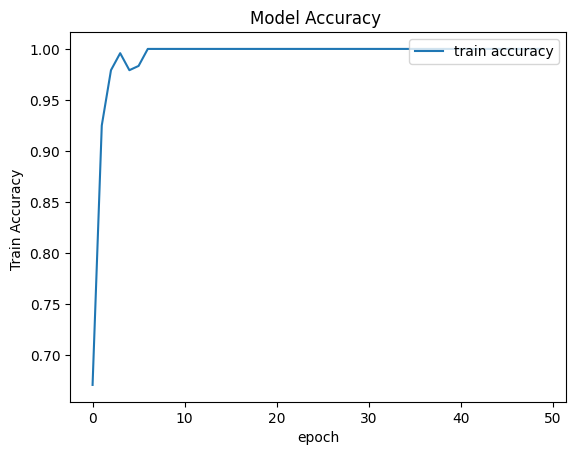

In [32]:
#plt.plot(history.history['loss'])
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'])
plt.title('Model Accuracy ')
plt.ylabel('Train Accuracy ')
plt.xlabel('epoch')
plt.legend(['train accuracy'], loc = 'upper right')
plt.show()

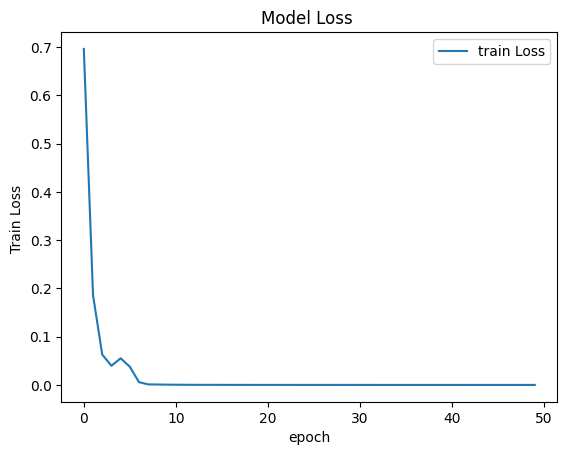

In [33]:
plt.plot(history.history['loss'])
plt.title('Model Loss ')
plt.ylabel('Train Loss ')
plt.xlabel('epoch')
plt.legend(['train Loss'], loc = 'upper right')
plt.show()


In [34]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)[::]
label = np.argmax(Y_test,axis = 1)[::]

print(pred)
print(label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
[2 0 0 0 0 2 1 2 0 2 2 0 0 1 1 0 2 0 2 2 1 2 2 1 1 0 2 1 1 1 2 1 0 2 0 1 0
 2 2 1 0 0 1 0 2 2 1 0 1 0 1 1 0 2 1 0 0 2 1 1]
[2 2 0 0 0 2 1 2 0 2 2 0 0 1 1 0 2 0 2 2 1 2 2 1 1 2 2 1 1 1 2 1 0 2 0 1 0
 2 2 1 0 0 1 0 2 2 1 0 1 0 1 1 0 2 1 0 0 0 1 1]


[[19  0  1]
 [ 0 20  0]
 [ 2  0 18]]


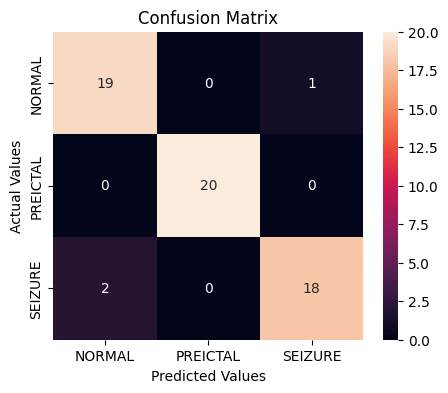

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(label, pred)
print(cm)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['NORMAL','PREICTAL','SEIZURE'],
                     columns = ['NORMAL', 'PREICTAL','SEIZURE'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [36]:
matrix = classification_report(label,pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        20
           1       1.00      1.00      1.00        20
           2       0.95      0.90      0.92        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



In [37]:
from sklearn.metrics import precision_recall_fscore_support
res = []
for l in [0,1,]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(label)==l,
                                                      np.array(pred)==l,
                                                      pos_label=True,average=None)
    res.append([l,recall[0],recall[1]])

In [38]:
pd.DataFrame(res,columns = ['class','sensitivity','specificity'])

,class,sensitivity,specificity
0,0,0.95,0.95
1,1,1.00,1.00


In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
# Instead of keras.utils import np_utils, use:
from tensorflow.keras.utils import to_categorical
import numpy
from sklearn.model_selection import KFold
import numpy
import keras
n_folds = 10

#initialize 10 fold validation
# Define the K-fold Cross Validator
kfold = KFold(n_splits=n_folds, shuffle=True)
cvscores = []

#10 fold cross validation loop
for train, test in kfold.split(X, Y):
    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['Accuracy','Recall','Precision','AUC'])
    history=model.fit(X[train], Y[train], epochs=50, batch_size=30, verbose=1)
    # evaluate the model
    scores = model.evaluate(X[test], Y[test], verbose=1)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - AUC: 0.7828 - Accuracy: 0.7094 - Precision: 0.7094 - Recall: 0.7094 - loss: 235.8172
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9227 - Accuracy: 0.8948 - Precision: 0.8948 - Recall: 0.8948 - loss: 37.4909
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9044 - Accuracy: 0.8726 - Precision: 0.8726 - Recall: 0.8726 - loss: 31.2240
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9578 - Accuracy: 0.9443 - Precision: 0.9443 - Recall: 0.9443 - loss: 10.5046
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9184 - Accuracy: 0.8924 - Precision: 0.8924 - Recall: 0.8924 - loss: 13.1213
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - AUC: 0.9709 - Accuracy: 0.9589 - Precision: 0.9589 - Recall: 0.9589 - loss: 2.3330
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 0.9675 - Accuracy: 0.9571 - Precision: 0.9571 - Recall: 0.9571 - loss: 1.9409
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - AUC: 

In [40]:
# Save the model in .h5 format
model.save("seizure_model.h5")
